Achintya Yedavalli

# Assignment 1 - Sentimental Laughter- Analyzing Poetic Moods

For the assignment, let's dive into the wacky world of sentiment analysis with the Gutenberg Poem Dataset, hosted here: https://huggingface.co/datasets/poem_sentimentLinks to an external site. ! Can we unravel the poetic mysteries and find out if and why poems make us laugh, cry, or just scratch our heads in confusion?

### Dataset Description:

Dataset Name: Gutenberg Poem Dataset

Hosted on HuggingFace: https://huggingface.co/datasets/poem_sentiment
Dataset Type: Sentiment dataset of poem verses from Project Gutenberg

Languages: English (en)

Structure: Train, validation, and test splits with sizes: 892, 105, and 104 examples respectively. *We are only using the train dataset*

## Task 1: Data Analysis

We are going to load, look at, and process the dataset here

In [1]:
from datasets import load_dataset

dset = load_dataset("poem_sentiment")

print(dset["train"])
print(dset["train"][0])

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['id', 'verse_text', 'label'],
    num_rows: 892
})
{'id': 0, 'verse_text': 'with pale blue berries. in these peaceful shades--', 'label': 1}


### Question 1: Understanding the Data

*Provide a brief analysis of the dataset structure. Discuss the key data fields, their meanings, and the sentiment label encoding.*

There are 3 fields per row in the dataset: `id`, `verse_text`, and `label`;. `id` is a number that represents a unique identifier in the dataset, `verse_text` is the actual text that is chopped up into the row, and `label` is the sentiment label, with sentiment values of 0 to 3, where 0 is positive, 1 is positive, 2 is neutral, and 3 is mixed. (from dataset website)


### Question 2: Preprocess the sentiment dataset

*Separately implement preprocessing of the "verse_text" field for each sentiment category (positive, negative, mixed) from the "train" split of the dataset.*

In [2]:
import pandas as pd
import string # for puncuation
# convert the dataset to a DataFrame for easier preprocessing
df = pd.DataFrame(dset["train"])

# iterate through and clean the text
def cleaning(text):
    stop_words = ["the", "The", "as", "and", "in", "to", "of", "a", "is", "it", "for", "on", "with", "that"] 
    # turn to lowercase
    text = text.lower().strip()
    # remove punctuation (from https://www.geeksforgeeks.org/python-remove-punctuation-from-string/)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # split text
    split_text = text.split()
    # remove stopwords
    split_text = [word for word in split_text if word not in stop_words]
    # reassemble strings    
    text = ' '.join(split_text)
    return text
        
df["verse_text"] = df["verse_text"].apply(cleaning)
# fixed via https://stackoverflow.com/questions/74852247/for-loop-not-saving-to-dataframe


### Split into 4 datasets for each sentiment value (because I forgot to do that apparently)

In [3]:
dfs = [x for _, x in df.groupby('label')]
df_negative = dfs[0]
df_positive = dfs[1]
df_neutral = dfs[2]
df_mixed = dfs[3]

## Task 2: Text Analysis

### Question 3: Frequency Analysis

Perform a frequency analysis of unique words and two-word phrases for each sentiment category

In [ ]:
# frequency analysis! (c+p from lab 1)

freq_lists = [{}, {}, {}, {}] # make list of dicts

def freq(line, id):
    split = line.split()
    for word in split: # for each word in the split text
        if word in freq_lists[id]: # if in then add to the value of the word 1
            freq_lists[id][word] += 1
        else:
            freq_lists[id][word] = 1 # the word is put in and the value is set to 1 (eg. "Langauge": 1)


df_negative["verse_text"].apply(lambda line: freq(line, 0))
df_positive["verse_text"].apply(lambda line: freq(line, 1))
df_neutral["verse_text"].apply(lambda line: freq(line, 2))
df_mixed["verse_text"].apply(lambda line: freq(line, 3))
# from https://stackoverflow.com/a/75465643 and extrapolated

In [5]:
# sort the dicts
# -
sorted_neg = list(sorted(freq_lists[0].items(), key=lambda item: item[1], reverse=True))
print("Top 10 of negative:\n", sorted_neg[:10])
# +
sorted_pos = list(sorted(freq_lists[1].items(), key=lambda item: item[1], reverse=True))
print("Top 10 of positive:\n", sorted_pos[:10])
# neutral
sorted_neu = list(sorted(freq_lists[2].items(), key=lambda item: item[1], reverse=True))
print("Top 10 of neutral:\n", sorted_neu[:10])
# mixed
sorted_mix = list(sorted(freq_lists[3].items(), key=lambda item: item[1], reverse=True))
print("Top 10 of mixed:\n", sorted_mix[:10])

Top 10 of negative:
 [('his', 13), ('but', 10), ('i', 8), ('their', 8), ('by', 8), ('which', 7), ('when', 6), ('thy', 6), ('from', 6), ('eyes', 5)]
Top 10 of positive:
 [('her', 11), ('thy', 10), ('sweet', 7), ('heart', 7), ('so', 7), ('their', 6), ('our', 6), ('all', 5), ('his', 5), ('by', 4)]
Top 10 of neutral:
 [('i', 56), ('his', 36), ('he', 34), ('you', 30), ('not', 26), ('my', 24), ('but', 24), ('all', 23), ('from', 23), ('have', 20)]
Top 10 of mixed:
 [('i', 8), ('his', 8), ('but', 5), ('through', 5), ('thou', 5), ('from', 5), ('was', 4), ('her', 4), ('death', 4), ('me', 4)]


From the dictionarys: it seems that negative poems make use of "his" and "but" most often, indicating strife between the narrator and some other man. This is the opposite for positive poems, who have "her" and "sweetheart" as 3 of the top 4 most used words, indicating a love story, which are usually positive. For neutral and mixed, They are dominated by the self in "I", though neutral also refers to men quite a lot with "his" and "he". Mixed's top word frequency is 8, which is in my opinion not enough for any serious analysis.

### Problem 4: Make wordclouds!

Create word cloud visualizations for each sentiment category. Discuss the differences observed in the word clouds and provide insights into the prominent words for each sentiment category.

In [6]:
# import wordcloud!
from wordcloud import WordCloud
import matplotlib.pyplot as plt

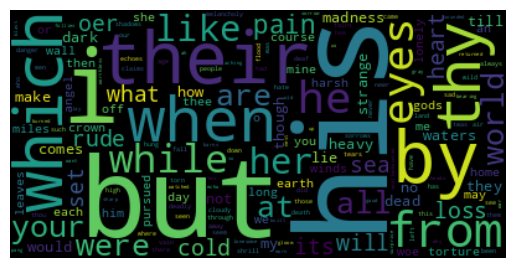

In [7]:
# negative wordcloud
negative = WordCloud()
negative.generate_from_frequencies(frequencies=dict(sorted_neg))
plt.figure()
plt.imshow(negative, interpolation="bilinear")
plt.axis("off")
plt.show()

Most prominent words are "his", "but", "like", "their" and other words. Strangely "her" much, much smaller than "his"

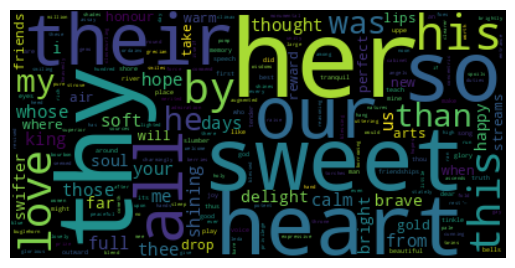

In [8]:
# positive wordcloud
positive = WordCloud()
positive.generate_from_frequencies(frequencies=dict(sorted_pos))
plt.figure()
plt.imshow(positive, interpolation="bilinear")
plt.axis("off")
plt.show()

Most prominemnt words are "her", "that", "so", "thy", "sweet", "heart", among others. Not as much "his" this time, meaning that we can see that men are the subject of negative lines while women are the subject of positive lines.

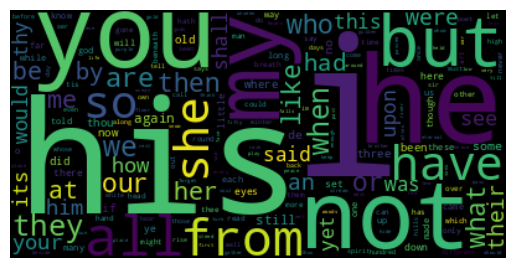

In [9]:
# neutral wordcloud
neutral = WordCloud()
neutral.generate_from_frequencies(frequencies=dict(sorted_neu))
plt.figure()
plt.imshow(neutral, interpolation="bilinear")
plt.axis("off")
plt.show()

Most prominent words are "he", "His", "I", "he", "not", "you", "but", "my", among others. Not much there with neutral.

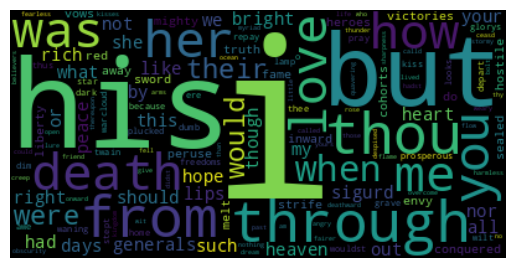

In [10]:
# mixed wordcloud
mixed = WordCloud()
mixed.generate_from_frequencies(frequencies=dict(sorted_mix))
plt.figure()
plt.imshow(mixed, interpolation="bilinear")
plt.axis("off")
plt.show()

Most prominent are "his" (by a MILE), "i", "but", "death", "through", among others, suggesting some melancholic lines about men and a mixed attitude about the self.

## Task 3: Analysis

### Question 5: Word Cloud Comparison

I felt that the wordclouds were not too different from one another. The biggest difference is in gendered words. The negative poems seem to mostly concern men as the subjects, while the positive poems seem to concern women as subjects. Makes sense, a negative poem is usually about a woman breaking up with a man while a positive poem is about a man falling in love with a woman. The neutral and mixed ones are a little too data-starved to really pull anything big out of; the `mixed` dataset only had 8 as the max occurences of any given word.

### Question 6: Insights

I felt like this was a good introductory exercise after a few weeks of class. The sentiment part, for the most part, was a little annoying after everything split, but it really didn't seem like that much was going wrong at any 1 time, which is nice. To improve the results I would go with the full dataset, not just the training dataset, though I understand why we used it (to simulate actually before building an ML model where we would need the splits). I could have also provided a better stopword list, which might have helped with some other word choices. But overall, I think its a job well done.